In [200]:
# import os
import qubic
import healpy as hp
import numpy as np
import pylab as plt
import matplotlib as mpl
import sys
import glob
from pysimulators import FitsArray
from qubic import gal2equ
from Tools import QubicToolsJCH as qt
%matplotlib inline
rc('figure',figsize=(15,10))
rc('font',size=12)

In [215]:
def smallhpmap(map, seen):
    ns = hp.npix2nside(len(seen))
    allmap = np.zeros(12*ns**2) + hp.UNSEEN
    allmap[seen] = map
    return allmap

(1, 15899, 3)
(2, 15899, 3)
(3, 15899, 3)
(4, 15899, 3)
(5, 15899, 3)


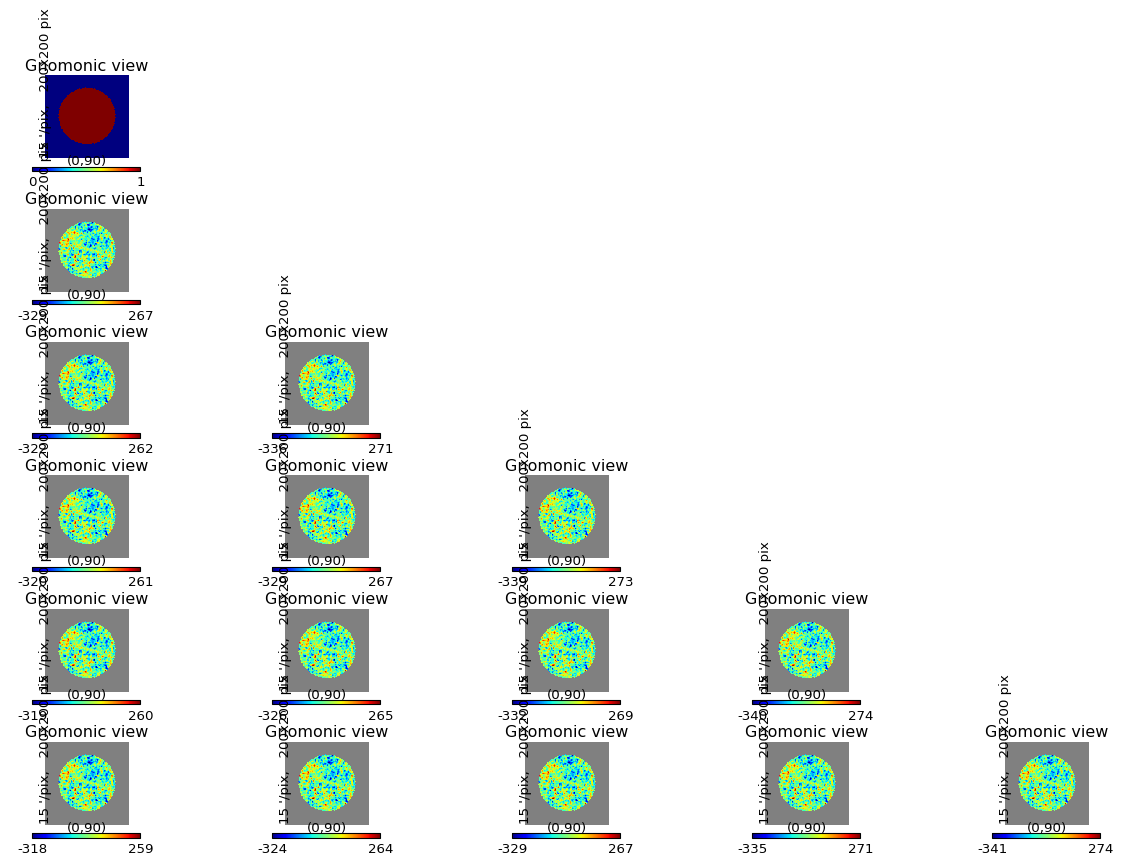

In [202]:
rep = '/Users/hamilton/Qubic/SpectroImager/NewMC/OutRepMC/'
nsubvals = np.array([1,2,3,4,5])

# All realizations have the same pointing therefore the seenmap 
# is always the same, as well as the input maps
nside = 256
seenmap = np.zeros(12*nside**2) == 0
for i in xrange(len(nsubvals)):
    filesout = glob.glob(rep+'*'+'1e-4'+'*nf{}*maps_recon.fits'.format(nsubvals[i]))
    maps = FitsArray(filesout[0])
    bla = np.mean(maps, axis=(0,2)) != hp.UNSEEN
    seenmap *= bla 
npixok = np.sum(seenmap)

mapsin = []
for i in xrange(len(nsubvals)):
    filesin = glob.glob(rep+'*'+'1e-4'+'*nf{}*maps_convolved.fits'.format(nsubvals[i]))
    maps = FitsArray(filesin[0])
    mapsin.append(maps[:,seenmap,:])
    print(mapsin[i].shape)

hp.gnomview(seenmap, rot=[0,90], reso=15, sub=(len(nsubvals)+1, len(nsubvals),1))
### Ip of the seen pixels
seen =  where(seenmap == 1)[0]

for i in xrange(len(nsubvals)):
    for j in xrange(nsubvals[i]):
        hp.gnomview(smallhpmap(mapsin[i][j,:,0], seenmap), rot=[0,90], reso=15, 
                    sub=(len(nsubvals)+1, len(nsubvals), (i+1)*len(nsubvals)+j+1))

In [203]:
# Now read all maps
tolstr='1e-4'
filesout = []
allmapsout = []
for i in xrange(len(nsubvals)):
    fout = glob.glob(rep+'*'+tolstr+'*nf{}*maps_recon.fits'.format(nsubvals[i]))
    print(nsubvals[i], len(fout))
    mapsout = np.zeros((len(fout), nsubvals[i], npixok, 3))
    print('reading {}'.format(nsubvals[i]))
    for ifile in xrange(len(fout)):
        mapsout[ifile,:,:,:] = FitsArray(fout[ifile])[:,seenmap,:]
    allmapsout.append(mapsout)

(1, 52)
reading 1
(2, 52)
reading 2
(3, 52)
reading 3
(4, 52)
reading 4
(5, 52)
reading 5


0
(0, 0, (52, 1), (52,), 38.039759331096811, 0.021188799120199876)
(0, 1, (52, 1), (52,), 0.30625571642727029, 0.0084294437434448369)
(0, 2, (52, 1), (52,), 1.8839085266767859, 0.0074327396797749098)
(1, 0, (52, 1), (52,), 68.716947907907411, 0.037877548894031783)
(1, 1, (52, 1), (52,), -0.15597056201893417, 0.0046711234275467143)
(1, 2, (52, 1), (52,), -0.15582801302508884, 0.014618480014122982)
1
(0, 0, (52, 2), (52,), 39.647896497076928, 0.010175258642918057)
(0, 1, (52, 2), (52,), 0.27131865646837838, 0.006673809134020733)
(0, 2, (52, 2), (52,), 1.8462130282415314, 0.004071537326340819)
(1, 0, (52, 2), (52,), 70.139595373258146, 0.011828898874935439)
(1, 1, (52, 2), (52,), -0.17155149298327879, 0.0047373640502625033)
(1, 2, (52, 2), (52,), -0.20170559594236923, 0.0069645811816777753)
2
(0, 0, (52, 3), (52,), 37.688540548304886, 0.01549314605096277)
(0, 1, (52, 3), (52,), 0.30067889784803209, 0.0057856234757133551)
(0, 2, (52, 3), (52,), 1.8067063807402202, 0.019622857215461448)
(1,

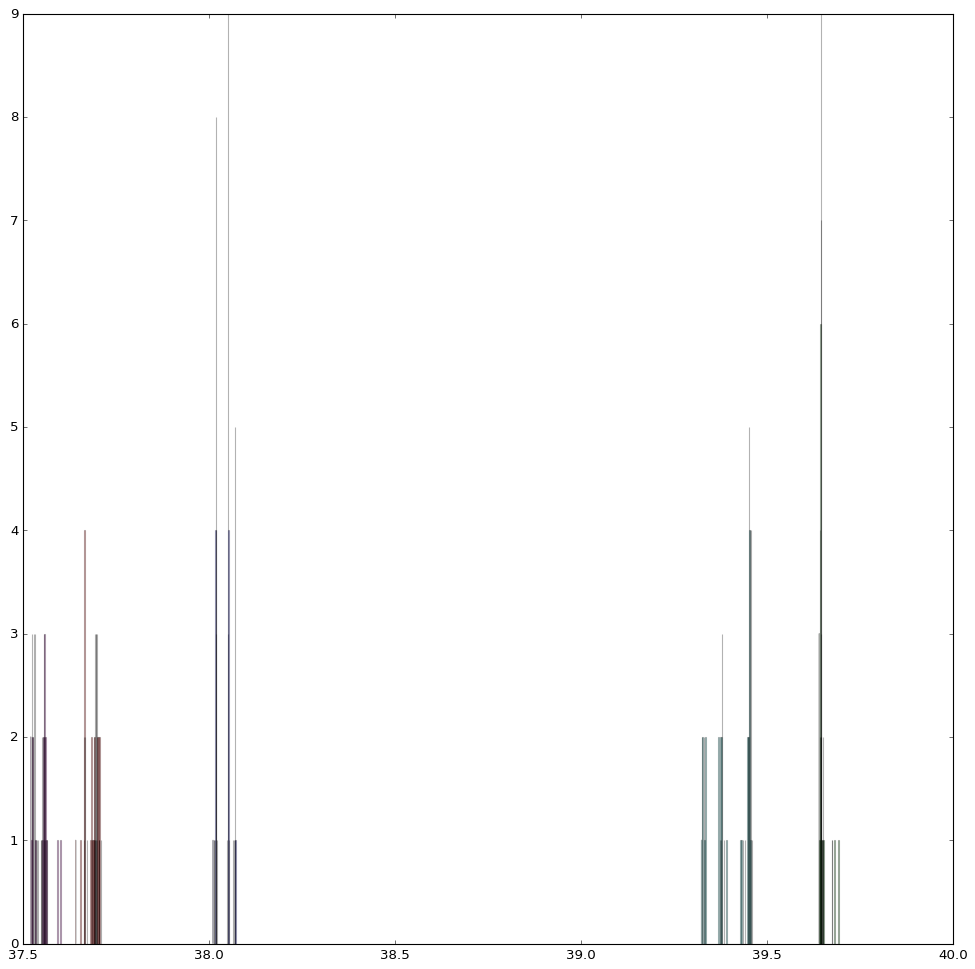

In [225]:
### Just look at direct Mean and RMS of pixels over 
### realizations as well as over the subfreqs. 
### In such a case one first
### averages over subfrequencies for a given realization, and the aveages over realizations

rmsmap = np.zeros((len(nsubvals),3,npixok))+hp.UNSEEN
meanmap = np.zeros((len(nsubvals),3,npixok))+hp.UNSEEN
bla = []
for i in arange(len(nsubvals)):
    print(i)
    mapsout = allmapsout[i]
    for p in arange(npixok):
        for iqu in [0,1,2]:
            meanoverfreqs = np.mean(mapsout[:,:,p,iqu], axis=1)
            meanmap[i,iqu,p] = np.mean(meanoverfreqs, axis=0)
            rmsmap[i,iqu,p] = np.std(meanoverfreqs, axis=0)
            #if ((p==0) & (iqu == 0)): bla.append(hist(meanoverfreqs, bins=100, alpha=0.3))
            if p<2: print(p,iqu,mapsout[:,:,p,iqu].shape,meanoverfreqs.shape, meanmap[i,iqu,p], rmsmap[i,iqu,p])

print('meanmap')
print(np.shape(meanmap))


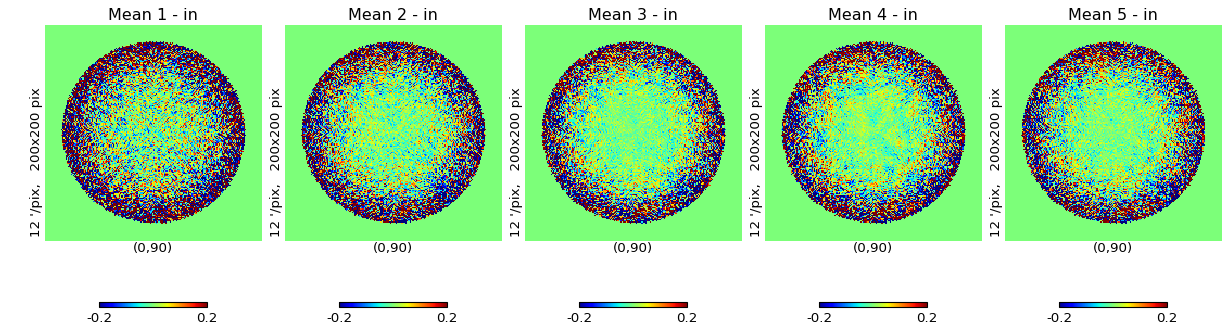

In [205]:
iqu=1
theinput = smallhpmap(mapsin[0][0,:,iqu],seenmap)
rng = 0.2
if iqu==0: rng=10
hp.gnomview(smallhpmap(meanmap[0,iqu,:],seenmap)-theinput, rot=[0,90], reso=12, sub=(1,5,1), title='Mean 1 - in', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[1,iqu,:],seenmap)-theinput, rot=[0,90], reso=12, sub=(1,5,2), title='Mean 2 - in', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[2,iqu,:],seenmap)-theinput, rot=[0,90], reso=12, sub=(1,5,3), title='Mean 3 - in', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[3,iqu,:],seenmap)-theinput, rot=[0,90], reso=12, sub=(1,5,4), title='Mean 4 - in', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[4,iqu,:],seenmap)-theinput, rot=[0,90], reso=12, sub=(1,5,5), title='Mean 5 - in', min=-rng, max=rng)

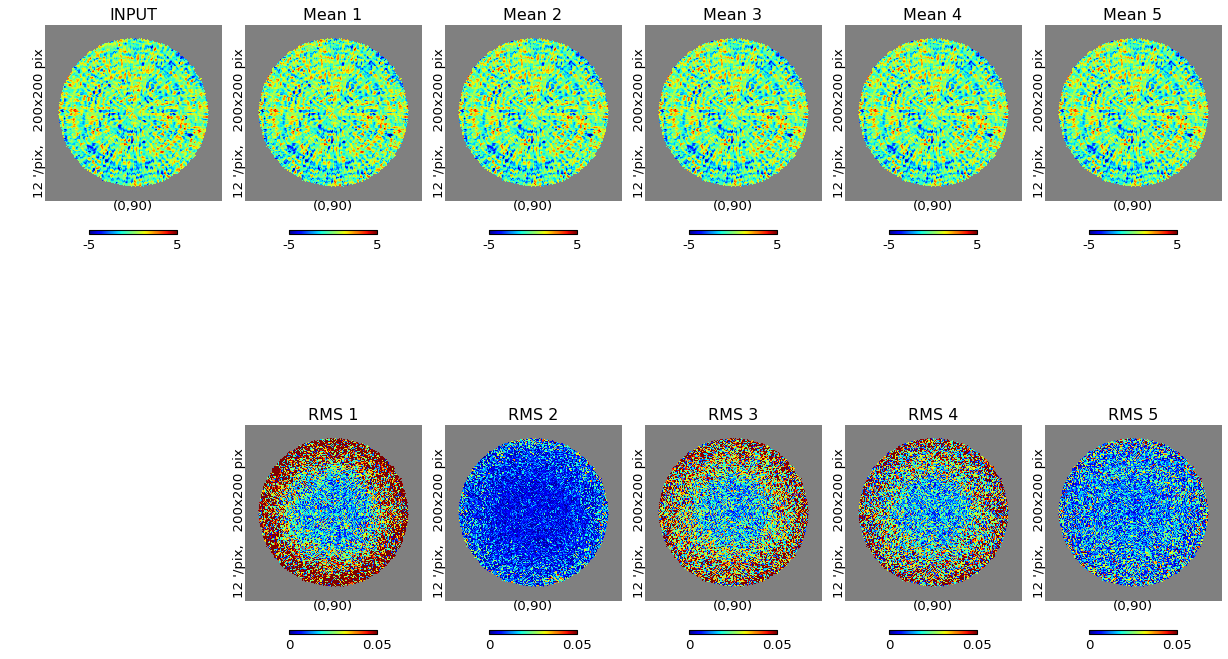

In [206]:
### Just look at the mean and RMS of the above stupid average (over all subfreqs and mc)
iqu=1
rng = 5.
if iqu==0: rng=300.
hp.gnomview(theinput, rot=[0,90], reso=12, sub=(2,6,1), title='INPUT', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[0,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,2), title='Mean 1', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[1,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,3), title='Mean 2', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[2,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,4), title='Mean 3', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[3,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,5), title='Mean 4', min=-rng, max=rng)
hp.gnomview(smallhpmap(meanmap[4,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,6), title='Mean 5', min=-rng, max=rng)
hp.gnomview(smallhpmap(rmsmap[0,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,8), title='RMS 1', min=0, max=rng/100)
hp.gnomview(smallhpmap(rmsmap[1,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,9), title='RMS 2', min=0, max=rng/100)
hp.gnomview(smallhpmap(rmsmap[2,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,10), title='RMS 3', min=0, max=rng/100)
hp.gnomview(smallhpmap(rmsmap[3,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,11), title='RMS 4', min=0, max=rng/100)
hp.gnomview(smallhpmap(rmsmap[4,iqu,:],seenmap), rot=[0,90], reso=12, sub=(2,6,12), title='RMS 5', min=0, max=rng/100)

In [207]:
#Now the test done by Matthieu Tristram: 
# calculate the variance map in each case accounting for the band-band covariance matrix 
# for each pixel from the MC. This is pretty noisy so it may be interesting to get the 
# average matrix
# We calculate all the matrices for each pixel and normalize them to 
# avergae 1 and then calculate the average matrix
variance_map = np.zeros((len(nsubvals), 3, npixok))+hp.UNSEEN
allmeanmat = []
allstdmat = []
for irec in xrange(len(nsubvals)):
    print('doing Nrec={}'.format(nsubvals[irec]))
    allmaps = allmapsout[irec]
    print(allmaps.shape)
    allmat = np.zeros((nsubvals[irec],nsubvals[irec],len(seen), 3))
    for p in xrange(len(seen)):
        for t in [0,1,2]:
            mat = cov(allmaps[:,:,p,t].T)
            allmat[:,:,p,t] = mat#/mean(mat)
            if size(mat) == 1: variance_map[irec,t,p] = mat
            else: variance_map[irec,t,p] = 1./sum(inv(mat))
    meanmat = np.zeros((nsubvals[irec],nsubvals[irec],3))
    stdmat = np.zeros((nsubvals[irec],nsubvals[irec],3))
    for t in [0,1,2]:
        meanmat[:,:,t] = np.mean(allmat[:,:,:,t], axis=2)
        stdmat[:,:,t] = np.std(allmat[:,:,:,t], axis=2)
    allmeanmat.append(meanmat)
    allstdmat.append(stdmat)
    

doing Nrec=1
(52, 1, 15899, 3)
doing Nrec=2
(52, 2, 15899, 3)
doing Nrec=3
(52, 3, 15899, 3)
doing Nrec=4
(52, 4, 15899, 3)
doing Nrec=5
(52, 5, 15899, 3)


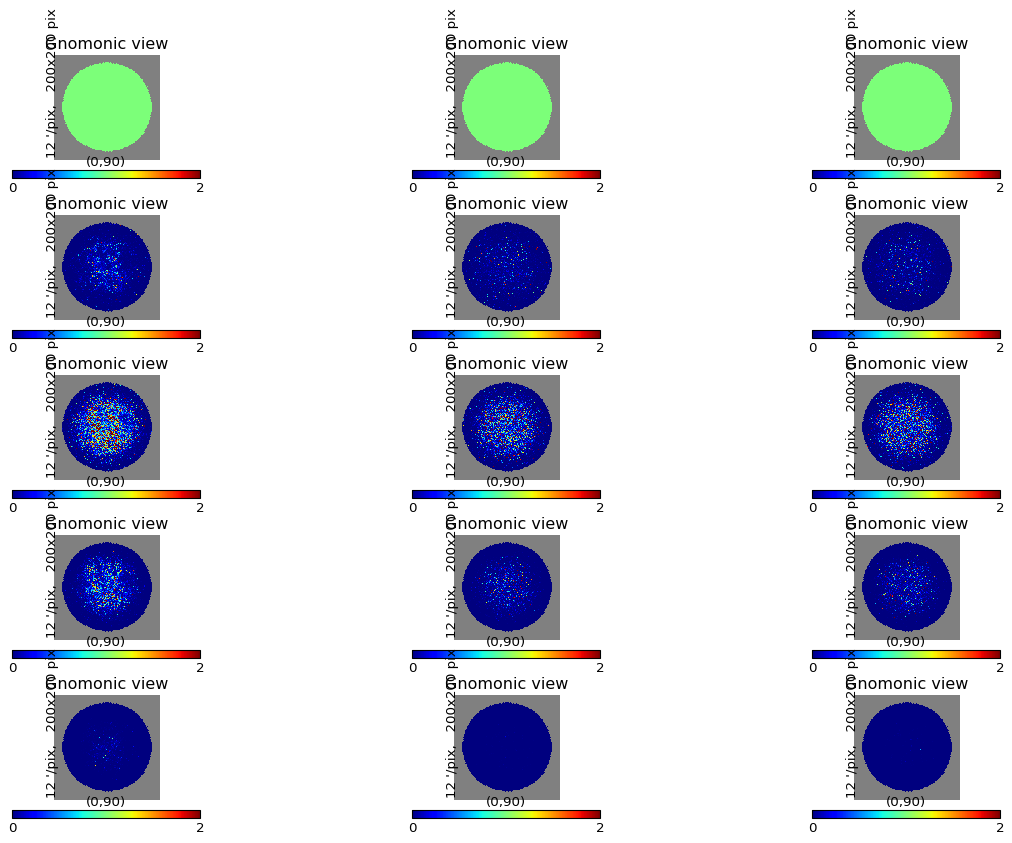

In [208]:
### The variance maps - seems that I don't get consistent results with Matt...
for irec in xrange(len(nsubvals)):
    for t in [0,1,2]:
        hp.gnomview(smallhpmap(variance_map[irec,t,:]/variance_map[0,t,:], seenmap), rot=[0,90], reso=12, 
                    sub=(len(nsubvals),3,irec*3+t+1), min=0, max=2)

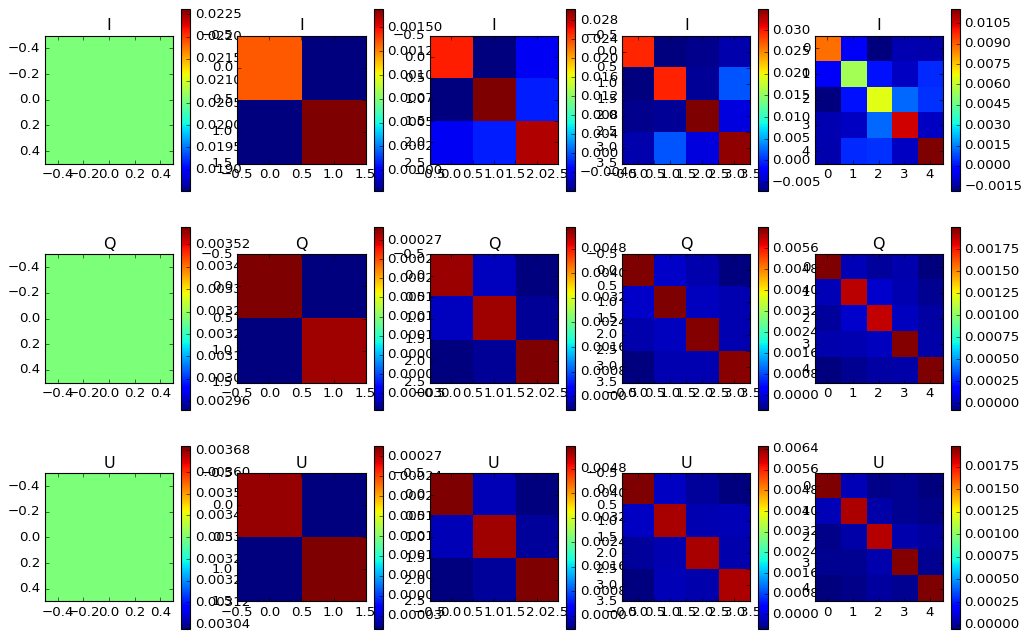

In [209]:
### Let's look at the mean correlation matrices
stokes = ['I', 'Q', 'U']
for irec in xrange(len(nsubvals)):
    for t in [0,1,2]:
        subplot(3,len(nsubvals),len(nsubvals)*t+irec+1)
        imshow(allmeanmat[irec][:,:,t], interpolation='nearest')
        colorbar()
        title(stokes[t])

In [210]:
### Npw we want to use these matrices to make the average over freqs for each MC 
### and then look at the mean and RMS. This si likely to be less noisy than calculating
### the variace map with a MC calculated matrix for each pixel.

def mean_cov(vals, invcov):
    AtNid = np.sum(np.dot(invcov, vals))
    AtNiA_inv = 1./np.sum(invcov)
    return AtNid*AtNiA_inv
    
rmsmap_cov = np.zeros((len(nsubvals),3,npixok))+hp.UNSEEN
meanmap_cov = np.zeros((len(nsubvals),3,npixok))+hp.UNSEEN

for i in arange(len(nsubvals)):
    print(i)
    mapsout = allmapsout[i]
    sh = mapsout.shape
    nreals = sh[0]
    for iqu in [0,1,2]:
        covmat = allmeanmat[i][:,:,iqu]
        invcovmat = inv(covmat)
        for p in xrange(npixok):
            vals = np.zeros(nreals)
            for real in xrange(nreals):
                vals[real] = mean_cov(mapsout[real,:,p,iqu], invcovmat)
            meanmap_cov[i,iqu,p] = np.mean(vals)
            rmsmap_cov[i,iqu,p] = np.std(vals)
            if p<2: print(p,iqu,mapsout[:,:,p,iqu].shape,meanmap_cov[i,iqu,p], rmsmap_cov[i,iqu,p])


0
(0, 0, (52, 1), 38.039759331096811, 0.021188799120199876)
(1, 0, (52, 1), 68.716947907907411, 0.037877548894031783)
(0, 1, (52, 1), 0.30625571642727023, 0.0084294437434448387)
(1, 1, (52, 1), -0.15597056201893417, 0.00467112342754671)
(0, 2, (52, 1), 1.8839085266767854, 0.0074327396797749055)
(1, 2, (52, 1), -0.15582801302508884, 0.014618480014122982)
1
(0, 0, (52, 2), 42.048421158670607, 0.0075421212365109139)
(1, 0, (52, 2), 72.211038038112576, 0.014841404492196869)
(0, 1, (52, 2), 0.27248479789012053, 0.0066159218547330373)
(1, 1, (52, 2), -0.17351165300020308, 0.0047401083547313552)
(0, 2, (52, 2), 1.8451439833537611, 0.0040200651025777134)
(1, 2, (52, 2), -0.2031805779092751, 0.0070239039870205527)
2
(0, 0, (52, 3), 40.027997641555913, 0.016521090187201656)
(1, 0, (52, 3), 70.33519222204653, 0.051410657249660534)
(0, 1, (52, 3), 0.30040174387489582, 0.0055620545400400625)
(1, 1, (52, 3), -0.17544908365823672, 0.0079246437483470912)
(0, 2, (52, 3), 1.8069273287400018, 0.019671272

In [211]:
newmap = np.zeros(len(seenmap))
newmap[seenmap]=1

In [212]:
FitsArray(meanmap).save('/Users/hamilton/Qubic/SpectroImager/mean_maps_tol{}.fits'.format(tolstr))
FitsArray(rmsmap).save('/Users/hamilton/Qubic/SpectroImager/rms_maps_tol{}.fits'.format(tolstr))
FitsArray(meanmap_cov).save('/Users/hamilton/Qubic/SpectroImager/mean_maps_cov_tol{}.fits'.format(tolstr))
FitsArray(rmsmap_cov).save('/Users/hamilton/Qubic/SpectroImager/rms_maps_cov_tol{}.fits'.format(tolstr))
FitsArray(np.sqrt(variance_map)).save('/Users/hamilton/Qubic/SpectroImager/rmsth_maps_tol{}.fits'.format(tolstr))
FitsArray(newmap).save('/Users/hamilton/Qubic/SpectroImager/seenmap_tol{}.fits'.format(tolstr))


(0, 0)


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in sqrt
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in sqrt


(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(4, 0)
(4, 1)
(4, 2)


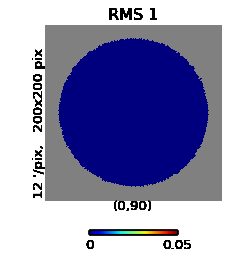

In [213]:
from pysimulators import profile
reso = 12
ally = np.zeros((10,len(nsubvals),3))
ally_cov = np.zeros((10,len(nsubvals),3))
ally_th = np.zeros((10,len(nsubvals),3))
for i in xrange(len(nsubvals)):
    for iqu in [0,1,2]:
        print(i,iqu)
        img = hp.gnomview(smallhpmap(rmsmap[i,iqu,:],seenmap), 
                          rot=[0,90], reso=12, sub=(2,6,8), 
                          title='RMS 1', min=0, max=0.05, return_projected_map=True)
        x, y = profile(img**2,bin=10)
        x *= reso *1. / 60
        ally[:,i,iqu] = np.sqrt(y)
    
        img_cov = hp.gnomview(smallhpmap(rmsmap_cov[i,iqu,:],seenmap), 
                              rot=[0,90], reso=12, sub=(2,6,8), 
                              title='RMS 1', min=0, max=0.05, return_projected_map=True)
        x, y = profile(img_cov**2,bin=10)
        x *= reso *1. / 60
        ally_cov[:,i,iqu] = np.sqrt(y)

        img_var = hp.gnomview(smallhpmap(variance_map[i,iqu,:],seenmap), 
                              rot=[0,90], reso=12, sub=(2,6,8), 
                              title='RMS 1', min=0, max=0.05, return_projected_map=True)
        x, y = profile(img_var,bin=10)
        x *= reso *1. / 60
        ally_th[:,i,iqu] = np.sqrt(y)


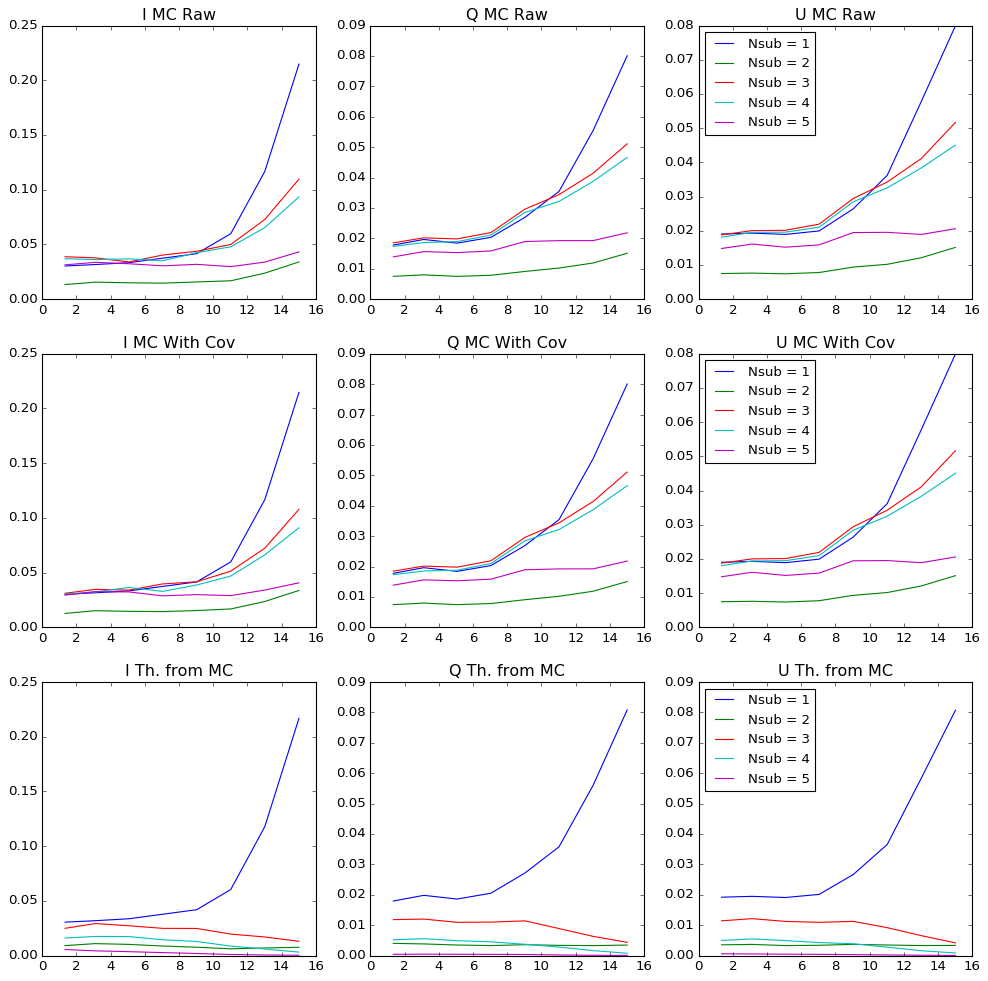

In [214]:
rc('figure',figsize=(15,15))
iqunames = ['I','Q','U']
for i in xrange(len(nsubvals)):
    for iqu in [0,1,2]:
        subplot(3,3,iqu+1)
        plot(x, ally[:,i,iqu], label='Nsub = {}'.format(i+1))
        if i==0: title(iqunames[iqu]+' MC Raw')
legend(fontsize=12, loc='upper left')
for i in xrange(len(nsubvals)):
    for iqu in [0,1,2]:
        subplot(3,3,iqu+1+3)
        plot(x, ally_cov[:,i,iqu], label='Nsub = {}'.format(i+1))
        if i==0: title(iqunames[iqu]+' MC With Cov')
legend(fontsize=12, loc='upper left')
for i in xrange(len(nsubvals)):
    for iqu in [0,1,2]:
        subplot(3,3,iqu+1+6)
        plot(x, ally_th[:,i,iqu], label='Nsub = {}'.format(i+1))
        if i==0: title(iqunames[iqu]+' Th. from MC')
legend(fontsize=12, loc='upper left')

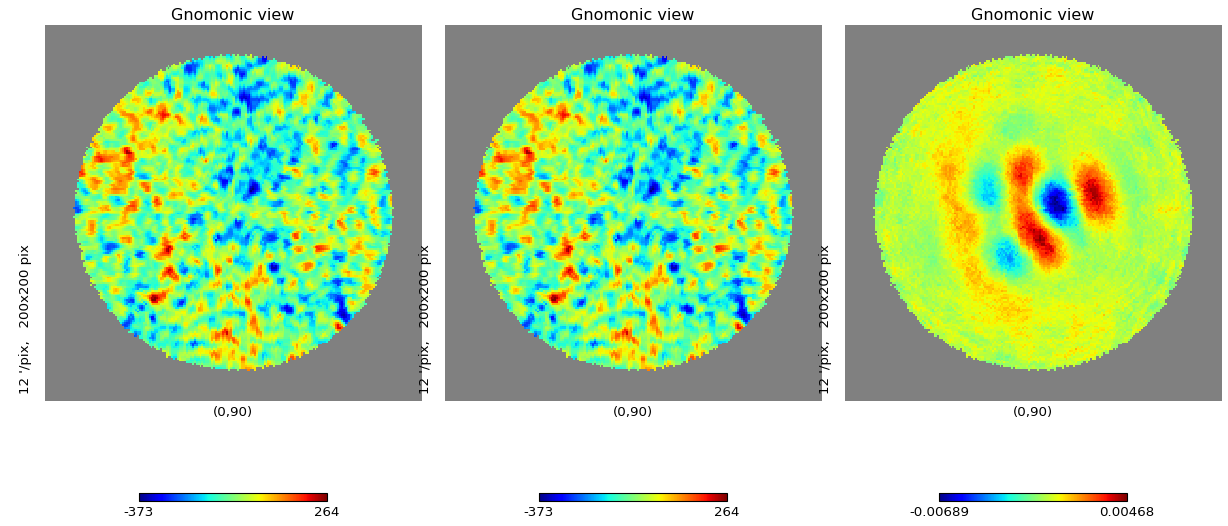

In [244]:
nsub = 4
isub = 3
iqu = 0
num0 = 1
num1 = 5
m0 = allmapsout[nsub-1][num0, isub, :, iqu]
m1 = allmapsout[nsub-1][num1, isub, :, iqu]

hp.gnomview(smallhpmap(m0,seenmap), rot=[0,90], reso=12, sub=(1,3,1))
hp.gnomview(smallhpmap(m1,seenmap), rot=[0,90], reso=12, sub=(1,3,2))
hp.gnomview(smallhpmap(m0-m1,seenmap), rot=[0,90], reso=12, sub=(1,3,3))
